# Assignment 9 - Multiple Linear Regression

## Problem statement 1
1.	An analytics company has been tasked with the crucial job of finding out what factors affect a startup company and if it will be profitable or not. For this, they have collected some historical data and would like to apply multilinear regression to derive brief insights into their data. Predict profit, given different attributes for various startup companies.

## 1. Business Problem

1.1 What is the business objective?
- Build a Multiple Linear Regression model to predict profit based on factors like R&D Spend, Administration, and Marketing Spend.

- Identify which features significantly contribute to profitability.

- Check for multicollinearity (using VIF) and influential data points (using influence plots).

- Evaluate model performance using RMSE, R-squared, and perform model tuning.

1.2 Are there any constraints?
- If input features are linearly correlated, they may cause multicollinearity and need to be dropped.

- The feature State is non-numeric and not useful in this analysis without transformation.

- Assumes linear relationships between predictors and the target.

- Quality of prediction may vary with data noise or outliers.

## 2. Data dictionary
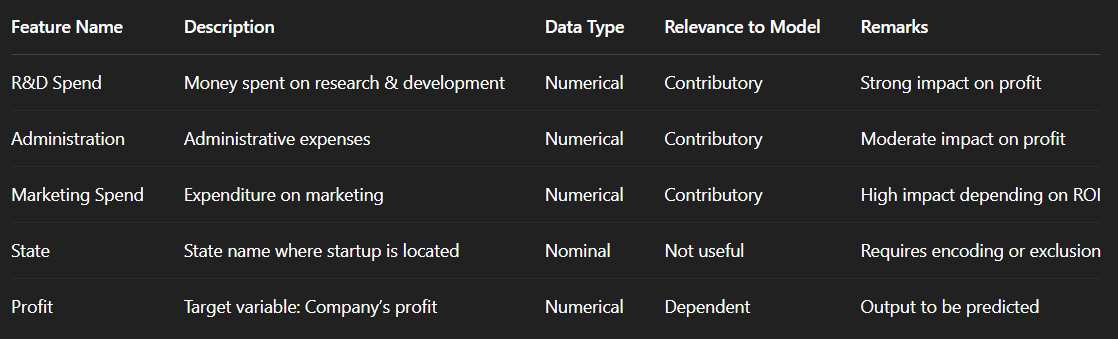

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

## 3. data preprocessing

In [5]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
#no null values, no need for imputation

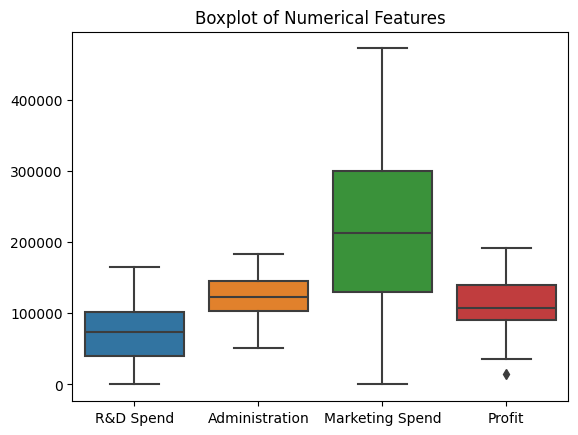

In [7]:
#checking outliers
sns.boxplot(data=df[["R&D Spend", "Administration", "Marketing Spend", "Profit"]])
plt.title("Boxplot of Numerical Features")
plt.show()

In [8]:
#very few outliers (almost none), no need for handling outliers

## 4. EDA

In [9]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


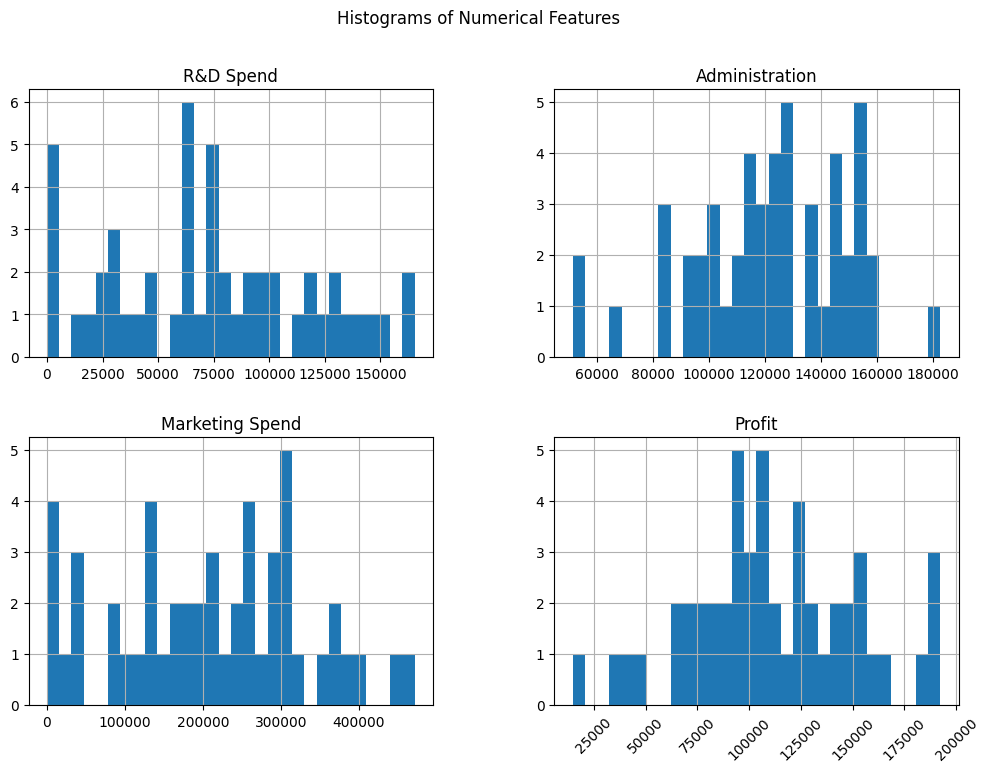

In [10]:
df.hist(figsize=(12,8),bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.xticks(rotation=45)
plt.show()

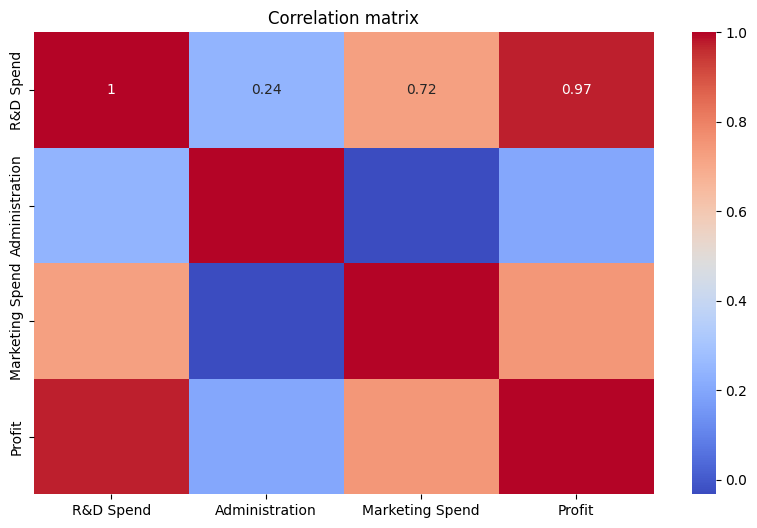

In [11]:
#correlation matrix
numeric_columns=['R&D Spend','Administration','Marketing Spend','Profit']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

In [12]:
df[numeric_columns].corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## 5. Model Building

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
#for regression, state column  is not required, so remove it
df = df.drop(columns=["State"])

In [15]:
target_col="Profit"

In [16]:
#Define features (X) and target (y)
X=df.drop(columns=[target_col])
y=df[target_col]

In [17]:
X

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
numeric_columns.pop(3)

'Profit'

In [20]:
scaler = StandardScaler()
X_train_scaled=X_train.copy()
X_test_scaled=X_test.copy()
X_train_scaled[numeric_columns]=scaler.fit_transform(X_train[numeric_columns])
X_test_scaled[numeric_columns]=scaler.transform(X_test[numeric_columns])

In [21]:
#Build Multilinear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
#Predict on test data
y_pred=model.predict(X_test_scaled)

In [23]:
#Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 115651.72050000001
Coefficients: [38014.73625775 -1841.47578233  3543.38628169]


In [24]:
#Check for Multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):\n", vif_data)


Variance Inflation Factor (VIF):
            Feature       VIF
0        R&D Spend  8.384571
1   Administration  4.026406
2  Marketing Spend  7.593984


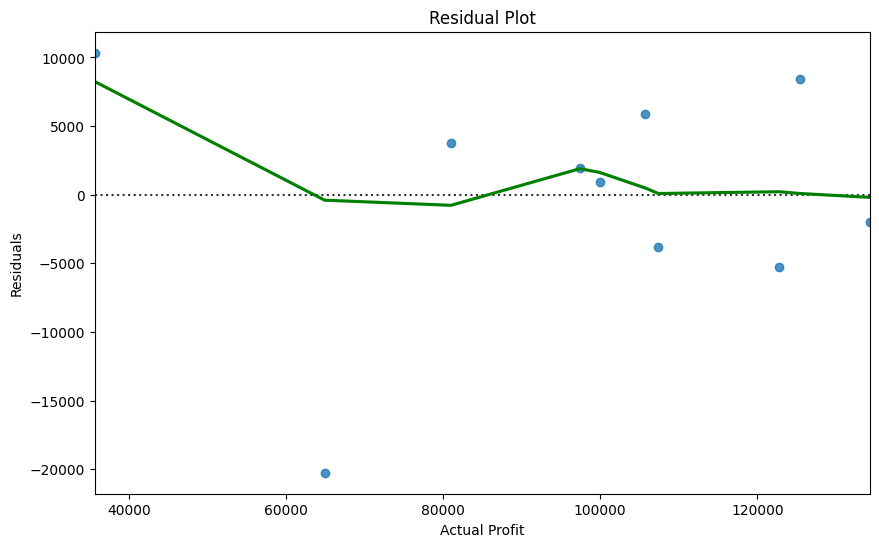

In [25]:
#Diagnostic Plots
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={"color": "green"})
plt.xlabel("Actual Profit")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [26]:

#Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 8995.91
R-Squared Score: 0.9001


In [27]:
#Model Tuning (Regularization)
#Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)
y_ridge_pred = ridge.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_ridge_pred))

In [28]:
#Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_lasso_pred = lasso.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_lasso_pred))

In [29]:
#Compare Models
print("\nModel Comparison:")
print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Ridge Regression RMSE: {ridge_rmse:.2f}")
print(f"Lasso Regression RMSE: {lasso_rmse:.2f}")


Model Comparison:
Linear Regression RMSE: 8995.91
Ridge Regression RMSE: 9178.35
Lasso Regression RMSE: 8995.80


In [30]:
# Ridge Tuning
from sklearn.model_selection import GridSearchCV
ridge_params = {"alpha": np.logspace(-3, 3, 50)}
ridge_cv = GridSearchCV(Ridge(), ridge_params, scoring="neg_mean_squared_error", cv=5)
ridge_cv.fit(X_train_scaled, y_train)
best_ridge = ridge_cv.best_estimator_
print(f"Best Ridge Alpha: {ridge_cv.best_params_['alpha']}")

Best Ridge Alpha: 0.001


In [31]:

# Lasso Tuning
lasso_params = {"alpha": np.logspace(-3, 3, 50)}
lasso_cv = GridSearchCV(Lasso(), lasso_params, scoring="neg_mean_squared_error", cv=5)
lasso_cv.fit(X_train_scaled, y_train)
best_lasso = lasso_cv.best_estimator_
print(f"Best Lasso Alpha: {lasso_cv.best_params_['alpha']}")

print("Lasso Coefficients:", lasso.coef_)

Best Lasso Alpha: 1.151395399326447
Lasso Coefficients: [38015.0880309  -1841.49019422  3543.02226589]


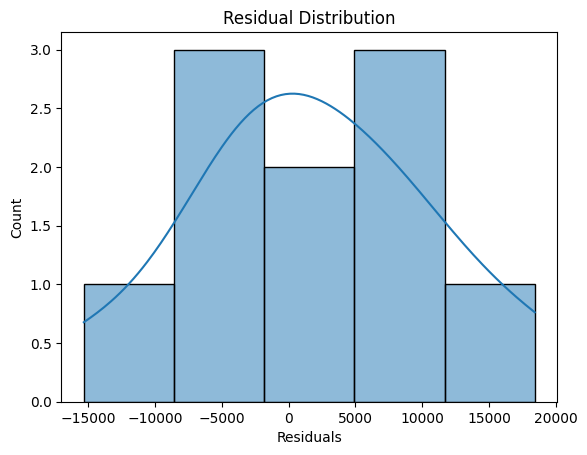

In [32]:

# Residual Distribution Plot
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()

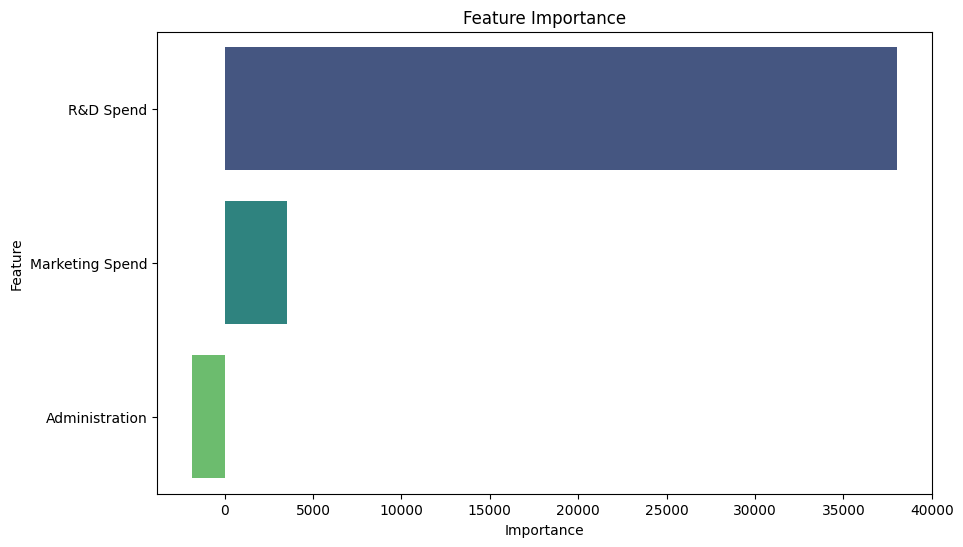


Feature Importance:
            Feature    Importance
0        R&D Spend  38014.736258
2  Marketing Spend   3543.386282
1   Administration  -1841.475782


In [33]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': numeric_columns,
    'Importance': model.coef_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

print("\nFeature Importance:\n", feature_importance)

## 6. Benefits of the solution
- Informed Investment Decisions: Startups can understand which factors (like R&D or marketing spend) have the greatest impact on profit, helping them allocate resources more effectively.

- Risk Reduction: By predicting profitability, founders and investors can assess potential risks early and make smarter business decisions.